# Exploratory Data Analysis (EDA) of the Iris Dataset
---

## Introduction

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrianllmm/ds100-ws1/blob/main/eda.ipynb)
[![View on GitHub](https://img.shields.io/badge/View%20on-GitHub-black?logo=github)](https://github.com/andrianllmm/ds100-ws1/blob/main/eda.ipynb)

This notebook presents an exploratory data analysis (EDA) of the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris), a classic dataset containing measurements of iris flowers.

The objective of this analysis is to examine the dataset’s structure, summarize its statistical properties, and identify patterns or relationships among the variables.

The dataset consists of 150 observations across three species (*Iris setosa*, *Iris versicolor*, and *Iris virginica*) with four numeric features: sepal length, sepal width, petal length, and petal width.

<p align="center">
  <img src="https://raw.githubusercontent.com/andrianllmm/ds100-ws1/main/images/iris.png" alt="Iris image" width="500">
</p>

## Setup

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load Iris dataset directly from GitHub avoiding local files
url = "https://raw.githubusercontent.com/andrianllmm/ds100-ws1/main/data/iris.data"

# The dataset has no header, so we provide column names
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, header=None, names=columns)

## Dataset Overview

In [39]:
# Preview the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Statistics

In [42]:
numeric_df = df.select_dtypes(include='number')

stats = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std()
})

stats

,Mean,Median,Standard Deviation
sepal_length,5.843333,5.80,0.828066
sepal_width,3.054000,3.00,0.433594
petal_length,3.758667,4.35,1.764420
petal_width,1.198667,1.30,0.763161


In [43]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [44]:
numeric_df = df.select_dtypes(include='number')

std_dev = numeric_df.std()

print("Feature with greatest variation:", std_dev.idxmax())
print("Standard deviation:", std_dev.max())

Feature with greatest variation: petal_length
Standard deviation: 1.7644204199522626


## Visualizations

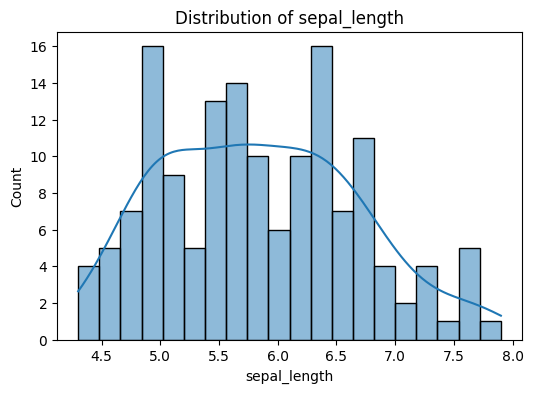

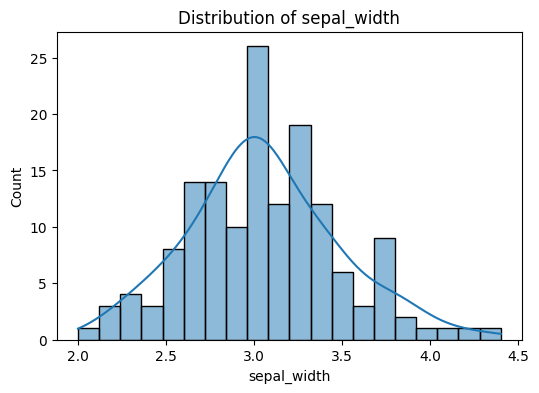

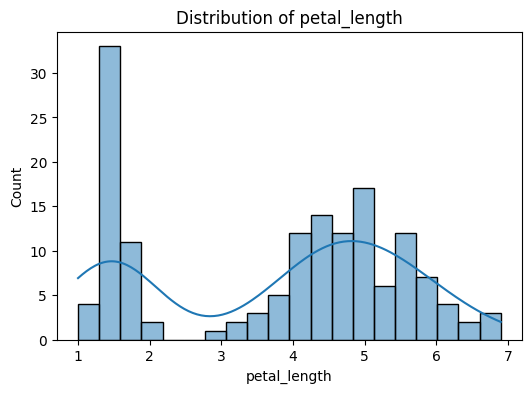

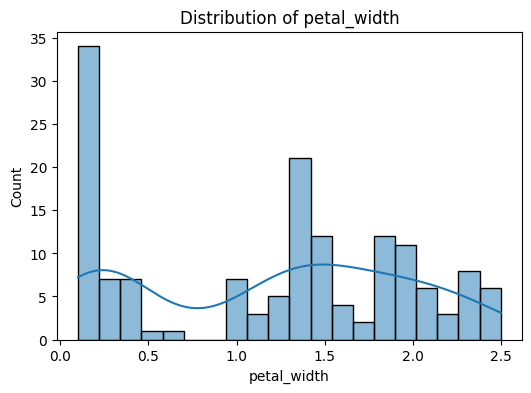

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=True,
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

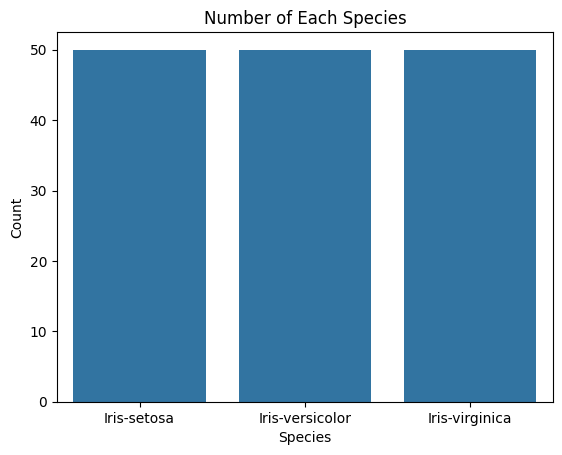

In [ ]:
sns.countplot(
    data=df,
    x='species',
)
plt.title('Number of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

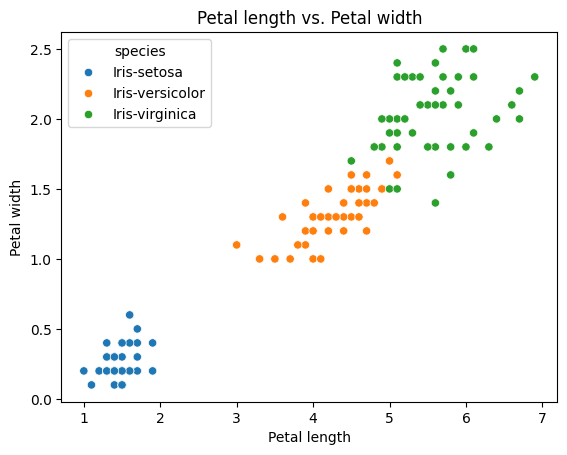

In [ ]:
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue='species',
)
plt.title('Petal length vs. Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

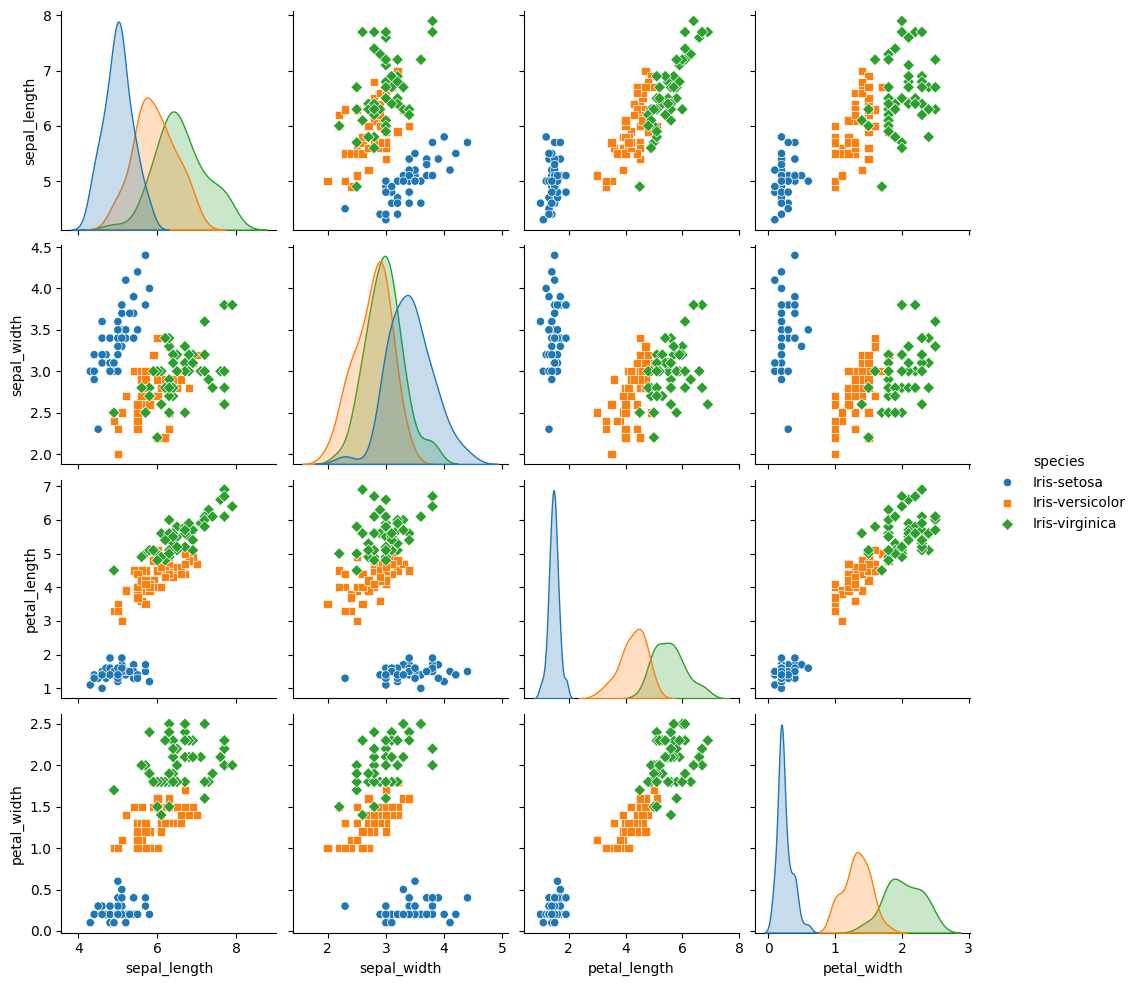

In [50]:
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

## Correlation Analysis

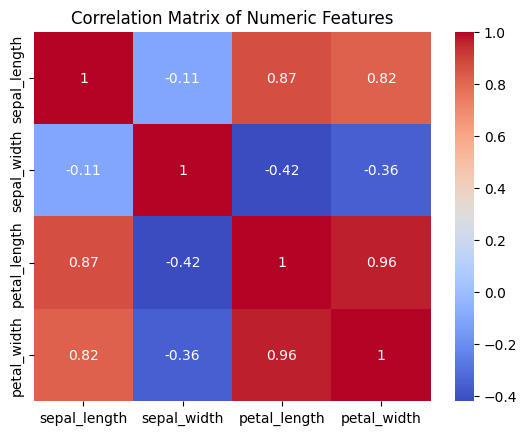

In [61]:
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [48]:
df.groupby('species')[['petal_length', 'petal_width']].corr()

petal_length  petal_width
species                                                
Iris-setosa     petal_length      1.000000     0.306308
                petal_width       0.306308     1.000000
Iris-versicolor petal_length      1.000000     0.786668
                petal_width       0.786668     1.000000
Iris-virginica  petal_length      1.000000     0.322108
                petal_width       0.322108     1.000000

## Insights

- 

## Reflection on Classifier

## Summary